Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [144]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [145]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [146]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [147]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

preds [1 1 1 1 0 0 0]
accuracy = 1.0


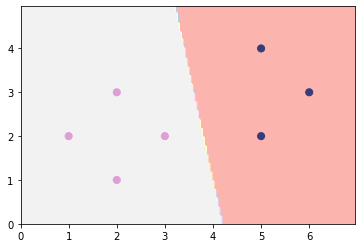

In [149]:
# Vaš kôd ovdje
cls = RidgeClassifier(alpha=0).fit(seven_X, seven_y)

h = cls.predict

preds = h(seven_X)
print("preds",preds)

print("accuracy =",accuracy_score(seven_y, preds))

plot_2d_clf_problem(seven_X, seven_y, h)
# plt.show()

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

preds [ True  True  True  True False False False]
accuracy = 1.0


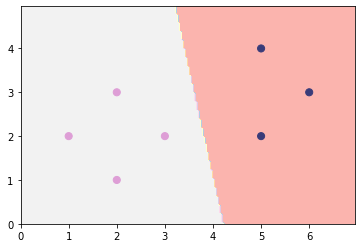

In [150]:
# Vaš kôd ovdje
reg = LinearRegression().fit(seven_X, seven_y)

h = lambda x : reg.predict(x) >= 0.5

preds = h(seven_X)
print("preds",preds)

print("accuracy =",accuracy_score(seven_y, preds))

plot_2d_clf_problem(seven_X, seven_y, h)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [151]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

preds [1 1 1 1 0 1 0 0]
accuracy = 0.875


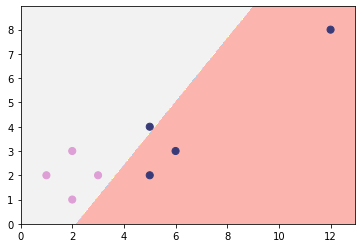

In [153]:
# Vaš kôd ovdje
cls = RidgeClassifier(alpha=0).fit(outlier_X, outlier_y)

h = cls.predict

preds = h(outlier_X)
print("preds",preds)

print("accuracy =",accuracy_score(outlier_y, preds))

plot_2d_clf_problem(outlier_X, outlier_y, h)

preds [ True  True  True  True False  True False False]
accuracy = 0.875


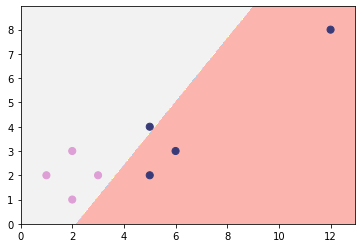

In [154]:
reg = LinearRegression().fit(outlier_X, outlier_y)

h = lambda x : reg.predict(x) >= 0.5

preds = h(outlier_X)
print("preds",preds)

print("accuracy =",accuracy_score(outlier_y, preds))

plot_2d_clf_problem(outlier_X, outlier_y, h)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [155]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

preds [1 1 1 1 0 0 0 1]
accuracy = 0.875


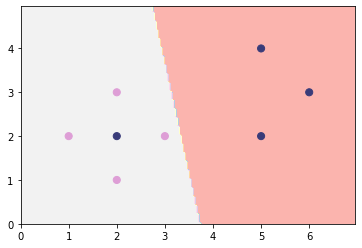

In [156]:
# Vaš kôd ovdje
cls = RidgeClassifier(alpha=0).fit(unsep_X, unsep_y)

h = cls.predict

preds = h(unsep_X)
print("preds",preds)

print("accuracy =",accuracy_score(unsep_y, preds))

plot_2d_clf_problem(unsep_X, unsep_y, h)

preds [ True  True  True  True False False False  True]
accuracy = 0.875


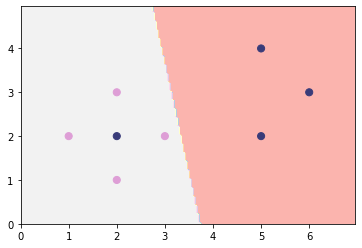

In [157]:
reg = LinearRegression().fit(unsep_X, unsep_y)

h = lambda x : reg.predict(x) >= 0.5

preds = h(unsep_X)
print("preds",preds)

print("accuracy =",accuracy_score(unsep_y, preds))

plot_2d_clf_problem(unsep_X, unsep_y, h)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

X = [[ 1.13488034 -1.55103777]
 [-1.30305489  1.04040973]
 [-0.71832001 -0.33485986]
 [-1.15722677 -1.80084259]
 [-1.21763949 -1.60496828]
 [-0.64992882 -0.41644332]
 [-0.2587577   1.75168808]
 [-0.19101831 -0.64050035]
 [-0.9022815  -0.731023  ]
 [-1.2766107  -2.47798915]
 [ 0.17558309 -0.06893999]
 [-0.72575745 -0.08325392]
 [-0.84276301  0.08802755]
 [-1.00768617 -1.13874118]
 [ 0.96474858  0.81774635]
 [ 1.42088174  1.22575227]
 [ 2.36556986  2.48585723]
 [-1.13459676 -1.1906433 ]
 [-1.16329024 -1.35768462]
 [ 1.39915826  1.04225814]
 [-0.98750262  1.56930408]
 [-0.70502462  1.15433274]
 [ 1.43324435  1.41864518]
 [ 1.0737789   1.59349871]
 [-1.10559603 -1.28336343]
 [-1.82329731  1.49795578]
 [-1.15693064 -2.07840667]
 [ 0.52047807  0.410668  ]
 [-0.70441162 -0.35906831]
 [-0.39339502  0.92784112]
 [ 0.83985378  0.87245532]
 [ 0.7967837  -0.11784421]
 [-0.45800495  1.61915947]
 [-2.00074469  2.02608289]
 [-0.99365863  1.46040994]
 [-0.31275022  0.89701832]
 [ 0.12407732  0.6877102

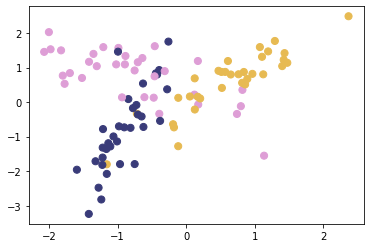

In [158]:
from sklearn.datasets import make_classification

N = 100
# Vaš kôd ovdje
X, y = make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
print("X =",X)
print("y =",y)

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

y1 = [0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1]
y2 = [0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0]
y3 = [1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0]

preds1 = [ 0.5250921   0.27409922  0.49096799  0.84747957  0.81389333  0.49985609
  0.00302734  0.49227875  0.59502212  1.00231943  0.33021521  0.43954634
  0.41774982  0.69220861  0.05278759 -0.08584375 -0.45924208  0.71797219
  0.75607945 -0.04513902  0.12692798  0.17985299 -0.12739756 -0.12132695
  0.73382315  0.24038013  0.90513958  0.18982636  0.49435885  0.1901604

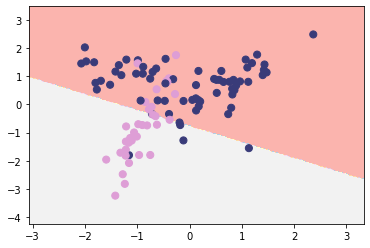

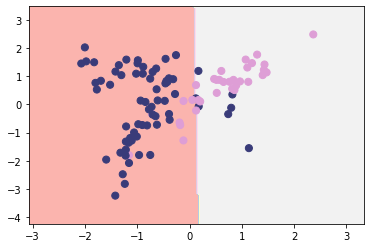

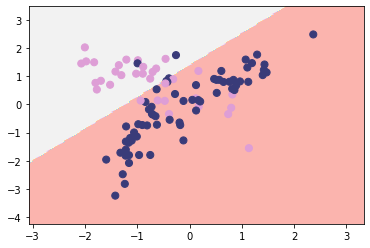

*************
Final classification (h(x) = argmax hj(x))
preds = [[ 5.25092101e-01  8.42589587e-01 -3.67681689e-01]
 [ 2.74099221e-01  4.60054074e-03  7.21300238e-01]
 [ 4.90967990e-01  2.02434208e-01  3.06597802e-01]
 [ 8.47479567e-01  4.34755178e-02  1.09044915e-01]
 [ 8.13893332e-01  2.32613155e-02  1.62845352e-01]
 [ 4.99856091e-01  2.25905030e-01  2.74238880e-01]
 [ 3.02734100e-03  3.71183785e-01  6.25788874e-01]
 [ 4.92278747e-01  3.84750505e-01  1.22970749e-01]
 [ 5.95022124e-01  1.36723148e-01  2.68254728e-01]
 [ 1.00231943e+00 -9.27673113e-04 -1.39175421e-03]
 [ 3.30215210e-01  5.14787881e-01  1.54996909e-01]
 [ 4.39546336e-01  2.00898398e-01  3.59555266e-01]
 [ 4.17749819e-01  1.60876650e-01  4.21373530e-01]
 [ 6.92208612e-01  9.83156730e-02  2.09475715e-01]
 [ 5.27875872e-02  7.93273781e-01  1.53938632e-01]
 [-8.58437488e-02  9.53799411e-01  1.32044338e-01]
 [-4.59242079e-01  1.28799925e+00  1.71242828e-01]
 [ 7.17972194e-01  5.39104582e-02  2.28117348e-01]
 [ 7.56079450e-01

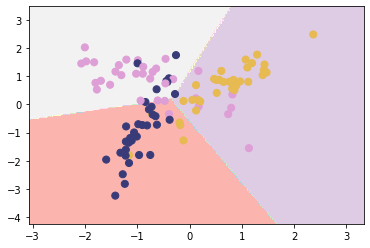

*************
Original multiclass classification - only 1 RidgeClassifier
>>>>> original_cls_preds = [1 2 0 0 0 0 2 0 0 0 1 0 2 0 1 1 1 0 0 1 2 2 1 1 0 2 0 1 0 2 1 1 2 2 2 2 1
 0 0 2 1 0 1 1 1 1 2 1 0 0 0 0 0 0 1 0 1 1 2 1 0 1 0 1 2 2 0 2 1 2 2 2 1 1
 2 0 0 1 1 1 2 2 2 2 1 2 0 0 1 0 1 1 2 2 1 2 0 1 2 0]


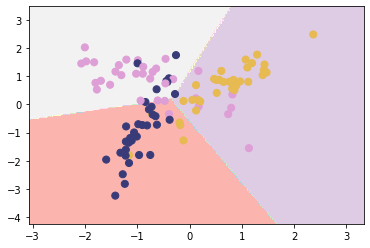

E01(ovr) = 0.22999999999999998
E01(ridge) = 0.22999999999999998
final_preds==y is True for how many elements:  77
original_cls_preds==y is True for how many elements:  77
final_preds==original_cls_preds is True for how many elements:  100
Are OVR and RidgeClassifier classifications same:  True


In [159]:
# Vaš kôd ovdje

y1 = np.where(y == 0, 1, 0)
y2 = np.where(y == 1, 1, 0)
y3 = np.where(y == 2, 1, 0)
print("y1 =",y1)
print("y2 =",y2)
print("y3 =",y3)
print()
cls1 = LinearRegression().fit(X, y1)
cls2 = LinearRegression().fit(X, y2)
cls3 = LinearRegression().fit(X, y3)

h1 = cls1.predict
h2 = cls2.predict
h3 = cls3.predict

preds1 = h1(X)
preds2 = h2(X)
preds3 = h3(X)
preds = np.array([preds1, preds2, preds3])
print("preds1 =",preds1)
print("preds2 =",preds2)
print("preds3 =",preds3)

h1_cls = lambda x : cls1.predict(x) >= 0.5
h2_cls = lambda x : cls2.predict(x) >= 0.5
h3_cls = lambda x : cls3.predict(x) >= 0.5
plot_2d_clf_problem(X, y1, h1_cls)
plt.show()
plot_2d_clf_problem(X, y2, h2_cls)
plt.show()
plot_2d_clf_problem(X, y3, h3_cls)
plt.show()

print("*************")
print("Final classification (h(x) = argmax hj(x))")
def predict(X):
    preds1 = h1(X)
    preds2 = h2(X)
    preds3 = h3(X)
    preds = np.array([preds1, preds2, preds3])
    
    preds = preds.T
    print("preds =",preds)
    final_preds = np.argmax(preds,axis=1)
    return final_preds

final_preds = predict(X)
print(">>>>> final_preds =",final_preds)

h = predict

plot_2d_clf_problem(X, y, h)
plt.show()

print("*************")
print("Original multiclass classification - only 1 RidgeClassifier")
cls = RidgeClassifier(alpha=0).fit(X, y)
h = cls.predict

original_cls_preds = h(X)
print(">>>>> original_cls_preds =",original_cls_preds)

plot_2d_clf_problem(X, y, h)
plt.show()
from sklearn.metrics import zero_one_loss
print("E01(ovr) =", zero_one_loss(y, final_preds))
print("E01(ridge) =", zero_one_loss(y, original_cls_preds))
print("final_preds==y is True for how many elements: ", np.count_nonzero(final_preds==y))
print("original_cls_preds==y is True for how many elements: ", np.count_nonzero(original_cls_preds==y))
ovr_and_ridge_same_count = np.count_nonzero(final_preds==original_cls_preds)
print("final_preds==original_cls_preds is True for how many elements: ", ovr_and_ridge_same_count)
print("Are OVR and RidgeClassifier classifications same: ", ovr_and_ridge_same_count==N)
    

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

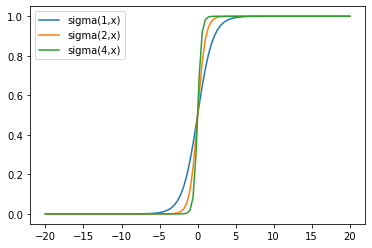

In [161]:
# Vaš kôd ovdje
sigma = lambda x, alfa=1 : 1 / (1+exp(-alfa*x))
x = np.linspace(-20, 20, 100)
alfa_lst = [1,2,4]

for alfa in alfa_lst:
    plt.plot(x, sigma(alfa, x), label=f"sigma({alfa},x)")
plt.legend(loc="best")
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [162]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def get_hypotheses(fi, w_all):
    h = sigma(np.dot(fi, w_all).reshape(1,-1)[0])
    
    return h

def cross_entropy_error_grad(h, yi, xi):
    cee_grad = (h - yi) * xi
    return cee_grad


def cross_entropy_error(y, h):
    cee = np.sum(-y*np.log(h) - (1-y)*np.log(1-h)) / len(y)
    
    return cee


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    # Vaš kôd ovdje
    
    N_examples = len(X)
    n_features = X.shape[1]

    
    poly = PolynomialFeatures(1)
    fi = poly.fit_transform(X)
    fi_new = fi.reshape((N_examples, n_features+1, 1))

    w_all = np.zeros((n_features+1, 1), dtype=float64)

    cee_last = None
    
    w_all_lst = []
    for k in range(max_iter):
        delta_w = np.zeros((n_features+1, 1), dtype=float64)
        
        h = get_hypotheses(fi, w_all)
        
        cee = cross_entropy_error(y, h)
        if cee_last is not None:
            if abs(cee - cee_last) < epsilon:
                print(f"abs(cee ({cee}) - cee_last({cee_last}) ) < epsilon ({epsilon})!!!")
                break
        cee_last = cee
        for i in range(N_examples):
            xi = fi_new[i]
            yi = y[i]
            hi = h[i]
            
            delta_w -= cross_entropy_error_grad(hi, yi, xi)
            

        w_all[0] += eta * delta_w[0]
        w_all[1:] = w_all[1:] * (1 - eta*alpha) + eta * delta_w[1:]
    
        w_all_lst.append(np.array(w_all))
        
    print("MAXITER kraj")
    return w_all if trace==False else (w_all, w_all_lst)
        
        
        
    
        
    

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

abs(cee (0.13521872720206746) - cee_last(0.13531865860896639) ) < epsilon (0.0001)!!!
MAXITER kraj
w = [[ 4.45449454]
 [-1.71089242]
 [ 0.68413507]]
CEE = 0.13521872720206746
fi = [[1. 2. 1.]
 [1. 2. 3.]
 [1. 1. 2.]
 [1. 3. 2.]
 [1. 5. 2.]
 [1. 5. 4.]
 [1. 6. 3.]]
preds = [ True  True  True  True False False False]


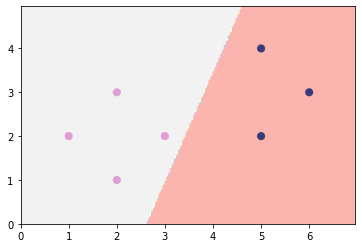

In [163]:
# Vaš kôd ovdje
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

w,wall = lr_train(seven_X, seven_y, max_iter=2000, trace=True)
print("w =", w)


poly = PolynomialFeatures(1)
seven_fi = poly.fit_transform(seven_X)
preds = get_hypotheses(seven_fi, w)
cee = cross_entropy_error(seven_y, preds)
print("CEE =", cee)

print("fi =",seven_fi)

def h(X):
    poly = PolynomialFeatures(1)
    fi = poly.fit_transform(X)
    
    return sigma(np.dot(fi, w)).reshape(1,-1)[0] >= 0.5
                 
print("preds =", h(seven_X))
plot_2d_clf_problem(seven_X, seven_y, h)


**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [164]:
from sklearn.metrics import zero_one_loss

abs(cee (0.13521872720206746) - cee_last(0.13531865860896639) ) < epsilon (0.0001)!!!
MAXITER kraj


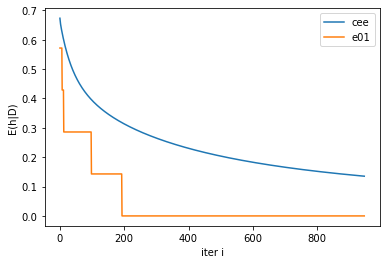

###########################

eta = 0.005
abs(cee (0.18842637642145538) - cee_last(0.1885263385084078) ) < epsilon (0.0001)!!!
MAXITER kraj
num_iter = 1142
CEE = 0.18842637642145538

eta = 0.01
abs(cee (0.13521872720206746) - cee_last(0.13531865860896639) ) < epsilon (0.0001)!!!
MAXITER kraj
num_iter = 947
CEE = 0.13521872720206746

eta = 0.05
abs(cee (0.06379986049860649) - cee_last(0.06389964580855934) ) < epsilon (0.0001)!!!
MAXITER kraj
num_iter = 511
CEE = 0.06379986049860649

eta = 0.1
abs(cee (0.046044708690215465) - cee_last(0.04614444996249484) ) < epsilon (0.0001)!!!
MAXITER kraj
num_iter = 378
CEE = 0.046044708690215465


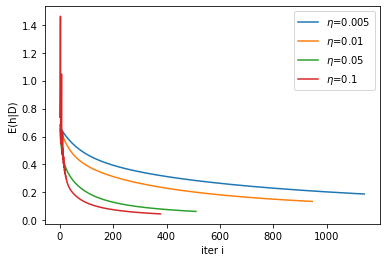

In [181]:
# Vaš kôd ovdje
def error_01(N, y, h):
    return (N-np.count_nonzero(y==(h>=0.5))) / N

w,wall = lr_train(seven_X, seven_y, trace=True)
    
num_iter = range(len(wall))
cee_lst = []
err01_lst = []
N = len(seven_y)

for w in wall:
    h = get_hypotheses(seven_fi, w)    
    
    cee = cross_entropy_error(seven_y, h)
    cee_lst.append(cee)
    
#     e01 = error_01(N, seven_y, h)
    e01 = zero_one_loss(seven_y, h>=0.5)
    err01_lst.append(zero_one_loss(seven_y, h>=0.5))
    
    
# print()
# print("w trace")
# for i,w in enumerate(wall):
#     print(i,w)
    
# print()
# print("cee")
# for i,cee in enumerate(cee_lst):
#     print(i,cee)

# print()
# print("e01")
# for i,e01 in enumerate(err01_lst):
#     print(i,e01)


plt.plot(num_iter, cee_lst, label="cee")
plt.plot(num_iter, err01_lst, label="e01")
plt.legend(loc="best")
plt.xlabel("iter i")
plt.ylabel("E(h|D)")
plt.show()

print("###########################")
eta_lst = [0.005,0.01,0.05,0.1]
cee_lst_per_eta = []
num_iter_lst_per_eta = []
is_loss_inf_flag_lst_per_eta = []
for eta in eta_lst:
    print()
    print("eta =",eta)
    w,wall = lr_train(seven_X, seven_y, eta=eta, trace=True)
    num_iter = range(len(wall))
    num_iter_lst_per_eta.append(num_iter)
    print("num_iter =",len(wall))
    
    cee_lst = []
    for w in wall:
        h = get_hypotheses(seven_fi, w)    

        cee = cross_entropy_error(seven_y, h)
        cee_lst.append(cee)
    cee_lst_per_eta.append(cee_lst)
    is_loss_inf_flag_lst_per_eta.append(cee_lst[-1] == inf)
    
    print("CEE =", cee_lst[-1])
    
    plt.plot(num_iter, cee_lst, label=f"$\eta$={eta}")
    
plt.xlabel("iter i")
plt.ylabel("E(h|D)")
plt.legend(loc="best")
plt.show()



**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

preds = [1 1 1 1 0 0 0]
h(x) =
.. 7.596663298414796e-10 0.9999999992403337
.. 1.305622276959184e-13 0.9999999999998694
.. 0.0 1.0
.. 2.6731502433929855e-05 0.9999732684975661
.. 0.9999999948095405 5.190459505089789e-09
.. 0.9999697916004565 3.0208399543480636e-05
.. 0.9999999999998525 1.4750057613179874e-13
CEE = 8.135237994034954e-06
01e = 0.0
w = [[-14.80304235   4.33454163]]
w0 = [46.26968486]
n iter = 21
accuracy = 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


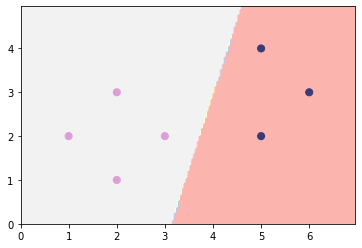

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Vaš kôd ovdje
cls = LogisticRegression(penalty='none', max_iter=2000, verbose=1).fit(seven_X, seven_y)
preds = cls.predict(seven_X)
print("preds =",preds)
proba_preds = cls.predict_proba(seven_X)
print("h(x) =")
for x in proba_preds:
    print("..",x[0],x[1])
    
# print("CEE =",cross_entropy_error(seven_y, proba_preds[:,1:].reshape(1,-1)[0]))
print("CEE =",log_loss(seven_y, proba_preds))
print("01e =",zero_one_loss(seven_y,preds))
# print(cls.classes_)
print("w =",cls.coef_)
print("w0 =",cls.intercept_)
print("n iter =",cls.n_iter_[0])

print("accuracy =",accuracy_score(seven_y, preds))
plot_2d_clf_problem(seven_X, seven_y, cls.predict)
plt.show()

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

w = [[-12.87743574   3.00708643]]
w0 = [42.32235916]
score = 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


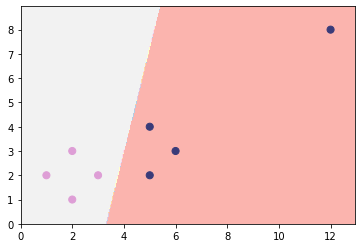

In [183]:
# Vaš kôd ovdje
cls = LogisticRegression(penalty='none', max_iter=2000, verbose=1).fit(outlier_X, outlier_y)
print("w =",cls.coef_)
print("w0 =",cls.intercept_)
print("score =", cls.score(outlier_X, outlier_y))
plot_2d_clf_problem(outlier_X, outlier_y, cls.predict)
plt.show()

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

abs(cee (0.13521872720206746) - cee_last(0.13531865860896639) ) < epsilon (0.0001)!!!
MAXITER kraj
w = [[ 4.45449454]
 [-1.71089242]
 [ 0.68413507]]
num iter = 947


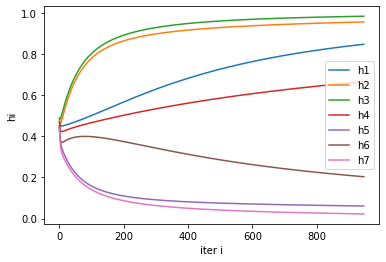

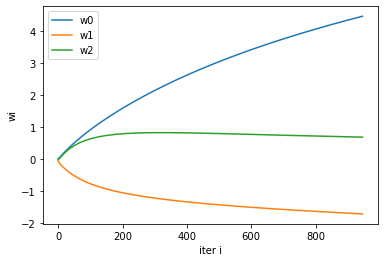

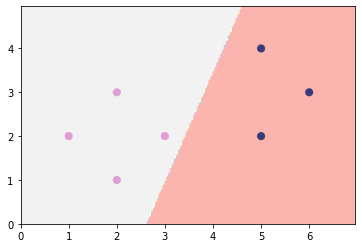

seven_X = [[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]]


In [186]:
# Vaš kôd ovdje
w,wall = lr_train(seven_X, seven_y, trace=True)
print("w =", w)
wall = np.array(wall)
print("num iter =",len(wall))
num_iter = range(len(wall))
# print(wall)


poly = PolynomialFeatures(1)
seven_fi = poly.fit_transform(seven_X)
h_all = []
for www in wall:
    h = get_hypotheses(seven_fi, www).reshape(len(seven_X),1)
    h_all.append(h)
#     print("h=",h)
    
h_all = np.array(h_all)

for i in range(len(seven_X)):
    plt.plot(num_iter, h_all[:,i], label=f"h{i+1}")
plt.xlabel("iter i")
plt.ylabel("hi")
plt.legend(loc="best")
plt.show()


w0 = wall[:,0]
w1 = wall[:,1]
w2 = wall[:,2]
plt.plot(num_iter, w0, label="w0")
plt.plot(num_iter, w1, label="w1")
plt.plot(num_iter, w2, label="w2")
plt.xlabel("iter i")
plt.ylabel("wi")
plt.legend(loc="best")
plt.show()


def h_pred(X):
    poly = PolynomialFeatures(1)
    fi = poly.fit_transform(X)

    
    return sigma(np.dot(fi, w)).reshape(1,-1)[0] >= 0.5
                 
plot_2d_clf_problem(seven_X, seven_y,h_pred)
plt.show()
print("seven_X =", seven_X)

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

abs(cee (0.4063526845140519) - cee_last(0.4064524196459286) ) < epsilon (0.0001)!!!
MAXITER kraj
w = [[ 2.10352878]
 [-1.0785606 ]
 [ 0.45549163]]
num iter = 454


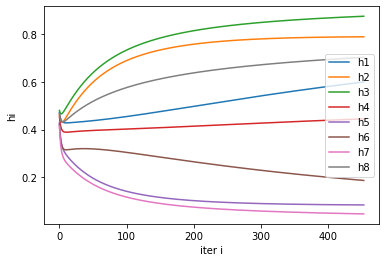

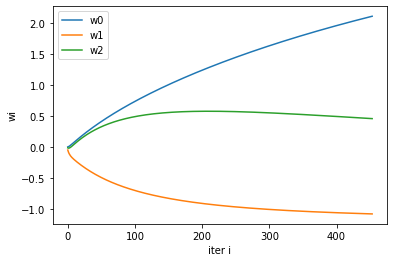

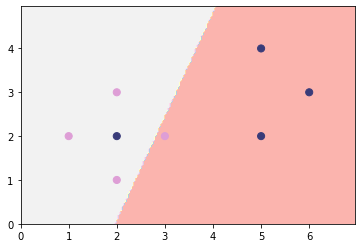

unsep_X = [[2 1]
 [2 3]
 [1 2]
 [3 2]
 [5 2]
 [5 4]
 [6 3]
 [2 2]]


In [188]:
# Vaš kôd ovdje
w,wall = lr_train(unsep_X, unsep_y, trace=True)
print("w =", w)
wall = np.array(wall)
print("num iter =",len(wall))
num_iter = range(len(wall))
# print(wall)


poly = PolynomialFeatures(1)
unsep_fi = poly.fit_transform(unsep_X)
h_all = []

for www in wall:
    h = get_hypotheses(unsep_fi, www).reshape(len(unsep_X),1)
    h_all.append(h)
#     print("h=",h)
    
h_all = np.array(h_all)

for i in range(len(unsep_X)):
    plt.plot(num_iter, h_all[:,i], label=f"h{i+1}")
plt.xlabel("iter i")
plt.ylabel("hi")
plt.legend(loc="best")
plt.show()


w0 = wall[:,0]
w1 = wall[:,1]
w2 = wall[:,2]
plt.plot(num_iter, w0, label="w0")
plt.plot(num_iter, w1, label="w1")
plt.plot(num_iter, w2, label="w2")
plt.xlabel("iter i")
plt.ylabel("wi")
plt.legend(loc="best")
plt.show()



def h_pred(X):
    poly = PolynomialFeatures(1)
    fi = poly.fit_transform(X)
    
    return sigma(np.dot(fi, w)).reshape(1,-1)[0] >= 0.5
                 
plot_2d_clf_problem(unsep_X, unsep_y, h_pred)
plt.show()
print("unsep_X =", unsep_X)

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [189]:
from numpy.linalg import norm


alpha = 0
abs(cee (0.13521872720206746) - cee_last(0.13531865860896639) ) < epsilon (0.0001)!!!
MAXITER kraj

alpha = 1
abs(cee (0.2019326295203718) - cee_last(0.20203257687177892) ) < epsilon (0.0001)!!!
MAXITER kraj

alpha = 10
abs(cee (0.43270691473020906) - cee_last(0.4328068981906191) ) < epsilon (0.0001)!!!
MAXITER kraj

alpha = 100
abs(cee (0.6741677984981026) - cee_last(0.6742425652216195) ) < epsilon (0.0001)!!!
MAXITER kraj

ALPHA = 0
num_iter 947
CEE 0.13521872720206746

ALPHA = 1
num_iter 804
CEE 0.2019326295203718

ALPHA = 10
num_iter 405
CEE 0.43270691473020906

ALPHA = 100
num_iter 4
CEE 0.6741677984981026


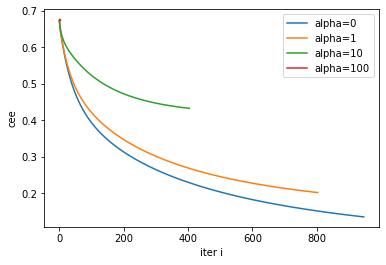


ALPHA = 0
num_iter 947
L2 4.820551347847474

ALPHA = 1
num_iter 804
L2 3.8078926934848614

ALPHA = 10
num_iter 405
L2 1.6627882005476715

ALPHA = 100
num_iter 4
L2 0.0412560209298346


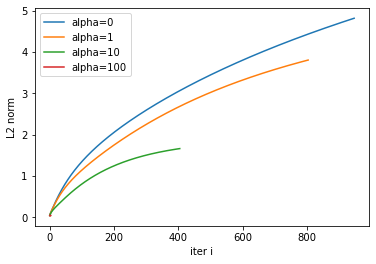

In [191]:
# Vaš kôd ovdje
# l2_norm = lambda x : sqrt(sum(x**2))
alpha_lst = [0,1,10,100]

num_iter_per_alpha = []
cee_lst_per_alpha = []
l2_norm_lst_per_alpha = []
for alpha in alpha_lst:
    print()
    print("alpha =", alpha)
    w,wall = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    num_iter = len(wall)
    num_iter_per_alpha.append(num_iter)
#     print("num_iter =",num_iter)
#     print("w =", w)

    
    cee_lst = []
    l2_norm_lst = []
    for w in wall:
        h = get_hypotheses(seven_fi, w)
        cee = cross_entropy_error(seven_y, h)
        cee_lst.append(cee)
#         l2_norm = l2_norm(w)
#         l2_norm = norm(w[1:]) # w bez w0 koji se ne regularizira
        l2_norm = norm(w)
#         print("l2(w) = ", l2_norm)
        l2_norm_lst.append(l2_norm)
    cee_lst_per_alpha.append(cee_lst)
    l2_norm_lst_per_alpha.append(l2_norm_lst)
    
# CEE
for i in range(len(alpha_lst)):
    print()
    print("ALPHA =",alpha_lst[i])
    num_iter = num_iter_per_alpha[i]
    cee_lst = cee_lst_per_alpha[i]
    print("num_iter",num_iter)
    print("CEE",cee_lst[-1])
    plt.plot(range(num_iter), cee_lst, label=f"alpha={alpha_lst[i]}")
plt.xlabel("iter i")
plt.ylabel("cee")
plt.legend(loc="best")
plt.show()


# L2 norma
for i in range(len(alpha_lst)):
    print()
    print("ALPHA =",alpha_lst[i])
    num_iter = num_iter_per_alpha[i]
    l2_norm_lst = l2_norm_lst_per_alpha[i]
    print("num_iter",num_iter)
    print("L2",l2_norm_lst[-1])
    plt.plot(range(num_iter), l2_norm_lst, label=f"alpha={alpha_lst[i]}")
plt.xlabel("iter i")
plt.ylabel("L2 norm")
plt.legend(loc="best")
plt.show()
    
    



**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [192]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

d = 2
preds = [1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1]
CEE = 0.29884648683172893
01e = 0.17000000000000004
w = [[-0.85435963  2.07567442  0.33633768 -0.09724293 -0.26647198]]
w0 = [-0.33583417]
num iter = 15


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


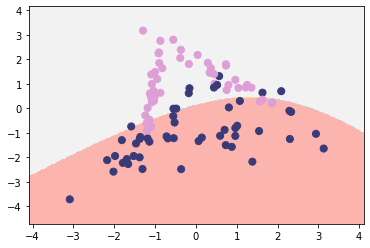

d = 3
preds = [0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1
 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1]
CEE = 0.24277690563446513
01e = 0.08999999999999997
w = [[-0.3580468   0.49753119  1.09584269 -0.28774616 -0.43480529 -0.48909993
   0.91063913 -0.03674333  0.91437114]]
w0 = [-0.81296908]
num iter = 27


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


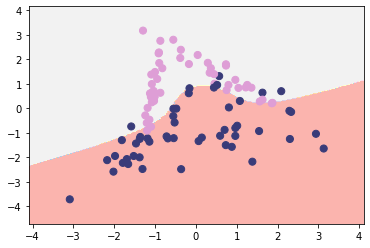

In [196]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje
# np.random.seed(100)
N = 100
X, y =make_classification(n_samples=N, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)

d_lst = [2,3]
for d in d_lst: 
    print("d =",d)
    poly = PolynomialFeatures(d)
    fi = poly.fit_transform(X)[:,1:]
    
    cls = LogisticRegression(penalty='l2', C=0.8, max_iter=2000,verbose=1).fit(fi, y)
    preds = cls.predict(fi)
    print("preds =",preds)
    proba_preds = cls.predict_proba(fi)

    print("CEE =",log_loss(y, proba_preds))
    print("01e =",zero_one_loss(y,preds))
#     # print(cls.classes_)
    print("w =",cls.coef_)
    print("w0 =",cls.intercept_)
    print("num iter =", cls.n_iter_[0])


    plot_2d_clf_problem(X, y, lambda x : cls.predict(poly.transform(x)[:,1:]))
    plt.show()
    
    
# test za vise reg. faktora alpha
# alpha_lst = [0,1,2,10,100]
# cee_per_alpha_dict = {}
# for d in d_lst:
#     cee_per_alpha_dict[d] = []
# for alpha in alpha_lst:
#     for d in d_lst: 
#         poly = PolynomialFeatures(d)
#         fi = poly.fit_transform(X)[:,1:]

#         if alpha != 0:
#             cls = LogisticRegression(penalty='l2', C=1/alpha, max_iter=2000, multi_class='multinomial',verbose=1).fit(fi, y)
#         else:
#             cls = LogisticRegression(penalty='none', max_iter=2000, multi_class='multinomial',verbose=1).fit(fi, y)
#         proba_preds = cls.predict_proba(fi)

        
#         cee_per_alpha_dict[d].append(log_loss(y, proba_preds))
        
# print("****")
# for d in d_lst:
#     print("d =",d)
#     print(cee_per_alpha_dict[d])
    
    
    

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?